# Video Game Sales

Hey Guys!! I have decided that I will be performing my analysis on a dataset called "Video Game Sales" that I picked up from kaggle. I decided to pick this dataset because I have a lot of interest and respect for the video game industry and I do feel that video games can be an amazing platform for compelling narratives. Some of my favourite games include "The Last of Us", "Bioshock" and "Red Dead Redemption 2".

The dataset itself contains a list of video games with sales greater than 100,000 copies. It has a total of 11 columns and 16,598 rows. It is important to note that the sales columns are in millions.

I will be using Pandas, Matplotlib, Seaborn and Numpy libraries which I learned in this excellent course to ask relevant questions about my dataset and draw appropriate conclusions.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We will be getting our Dataset from the URL given below and we will be using the `opendatasets` Python library to download the required dataset :-

https://www.kaggle.com/gregorut/videogamesales

In [7]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  gregorut/videogamesales


0it [00:00, ?it/s]

393216it [00:00, 396549.27it/s]                                                                                        

Extracting archive .\videogamesales.zip to .\videogamesales


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './Video-Game-Sales'

The `os` module in Python provides many functions for interacting with the OS and the filesystem. We import it and use the `os.listdir` function to get the list of files in a directory. 

In [1]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Assignment 2.ipynb',
 'climate.txt',
 'climate_results.txt',
 'countries.csv',
 'Course Project.ipynb',
 'covid-countries-data.csv',
 'data',
 'italy-covid-daywise.csv',
 'Lesson-2 Practice .ipynb',
 'Lesson-5 matplotlib practice .ipynb',
 'Numpy Library (Practice).ipynb',
 'Pandas Practice .ipynb',
 'pandas-practice-assignment.ipynb',
 'vgsales.csv']

As you can see, the required dataset has been downloaded and saved as `vgsales.csv`

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "video-game-sales" # change this (use lowercase letters and hyphens only)

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Creating a new project "singularity-101/video-game-sales"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'

## Data Preparation and Cleaning





Our Dataset has been stored in CSV format. Here is a brief overview of what CSV files are:-

>**CSVs**: It is a delimited text file used to store data in which each line is a data record and has fields seprated by a comma. A CSV file is typically used to store tabular data.

The first line of the file is the header, which indicates what each of the numbers on the remaining lines represent.





Now to work with this file efficiently we will use the Python Pandas library which provides helper funtions to read data from various file formats like CSV, Excel, Spreadsheets and more. It is typically imported with the alias pd.

In [1]:
import pandas as pd 

To read the file, we can use the `read-csv` method from Pandas.

In [2]:
video_games_df=pd.read_csv("vgsales.csv")

- Data from the file is read and stroed in a `Dataframe` object- one of the core data structures in Pandas for storing and working with tabular data. We typically use the `_df` suffix in the variable names for dataframes. 

- Dataframe can be considered as a dictionary of lists where the keys are column names, and the values are lists/arrays containing  data for the respective columns.

In [3]:
type(video_games_df)

pandas.core.frame.DataFrame

In [16]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


We can view some basic information about the dataframe using the `.info()` method

In [26]:
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here, we can see the name of all the columns the dataset has and the data type of the values contained by each column. We can also see the size of the dataframe.

To get the number of rows and columns in the dataframe, use the `.shape` method

In [27]:
video_games_df.shape

(16598, 11)

To get the name of the columns in the form of a list, use the `.columns` method

In [34]:
video_games_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "singularity-101/video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'

## Exploratory Analysis and Visualization

In order to get a better understanding about the data we have in our dataframe and the relationship between different columns it is better we do a graphical representation of our data.

For that we will be using the `matplotlib.pyplot` library for basic plots and the `seaborn` module which will be used for more advanced plots.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

We added `%matplotlib inline` to ensure that the plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes the plots may show up in pop-up windows.

<br/>

We are also improving the graphs visually by using the `sns.set_style` to use a default style that is provided in the Seaborn library. The default style is further improved by modifying the `matplotlib.rcParams` dictionary.

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In order to view some statistical information about numeric columns like mean, standard deviation, minimum/maximum values etc we use the `.describe` method

In [6]:
video_games_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [55]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### **Comparing the total sales of various genres of Games**

* The `groupby()` method is used to split the data into groups based on some criteria.

* Along with a grouping,  we need to specify a way to aggregate the data for each group and that is where the `sum()` method comes in.

* The `reset_index()` method is used to reset the index of the dataframe we have created and use the default one instead.

In [5]:
genre_df= video_games_df.groupby("Genre")[["Genre","Global_Sales"]].sum().reset_index()

* The rows are sorted by a specific column using the `.sort_values()`.
* By default the rows are sorted in an ascending order.
* To sort the rows in descending order we specified `ascending = False`.

In [6]:
genre_df.sort_values("Global_Sales", ascending = False)

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


* Bar charts show a sequence of values and there is a bar for each value. We can use the `plt.bar` function to draw a bar chart.

* Labels to the axes are added using the `plt.xlabel` and `plt.ylabel` methods.

* The entire chart is given a title using the `plt.title` funtion.

* The font-size for the labels and the title are set using the `fontsize` attribute.

* We include the `;` at the end of the last statement in the cell to avoid showing the ouptut and just display the graph.

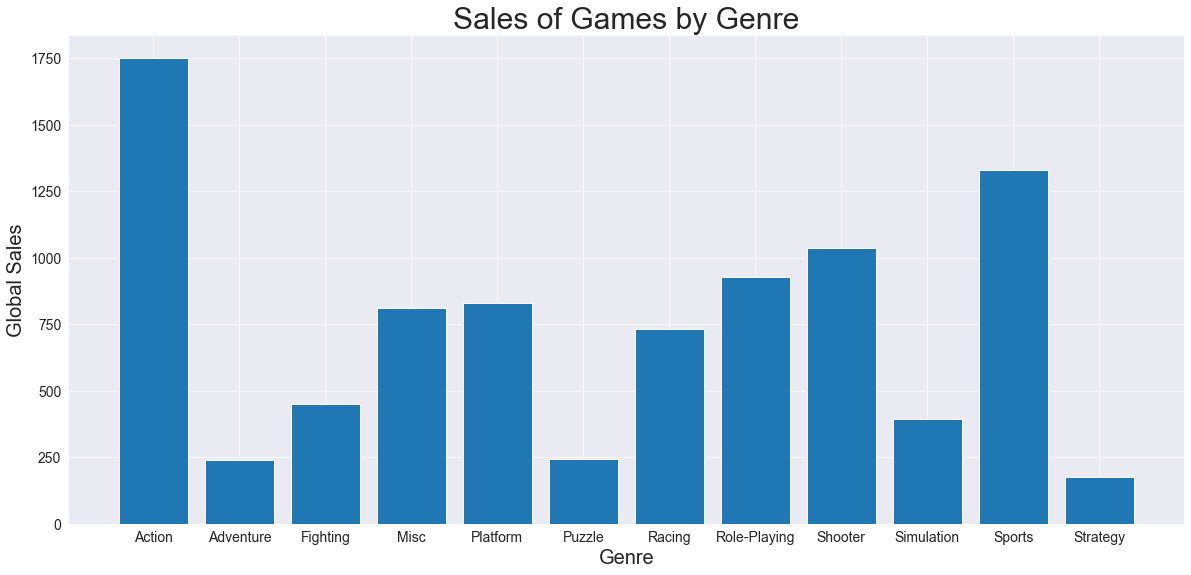

In [38]:
plt.bar(genre_df.Genre, genre_df.Global_Sales)
plt.xlabel("Genre",fontsize=20)
plt.ylabel("Global Sales",fontsize=20)
plt.title("Sales of Games by Genre",fontsize=30);

As we can see, the Action genre is at the top followed by the Sports and Shooters genre.

### **Comparing the sales of games on various platforms**

In [7]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Here, we will be grouping the dataframe using the "Platform" column and then aggregating it using the `sum()` method.

In [35]:
platform_df= video_games_df.groupby("Platform")[["Platform","Global_Sales"]].sum().reset_index()

In [36]:
platform_df

,Platform,Global_Sales
0,2600,97.08
1,3DO,0.10
2,3DS,247.46
3,DC,15.97
4,DS,822.49
5,GB,255.45
6,GBA,318.50
7,GC,199.36
8,GEN,28.36
9,GG,0.04


Line charts are one of the most simplest and most widely used data visualization techniques. A line chart displays information as a series of data points or markers, connected by straight lines. To draw a line chart, we use the `plt.plot` function.

The `plt.plot` function supports many arguments for styling lines and markers :-

- `color` or `c`: set the color of the line ([supported colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html))
- `linestyle` or `ls`: choose between a solid or dashed line
- `linewidth` or `lw`: set the width of a line
- `markersize` or `ms`: set the size of markers
- `markeredgecolor` or `mec`: set the edge color for markers
- `markeredgewidth` or `mew`: set the edge width for markers
- `markerfacecolor` or `mfc`: set the fill color for markers
- `alpha`: opacity of the plot



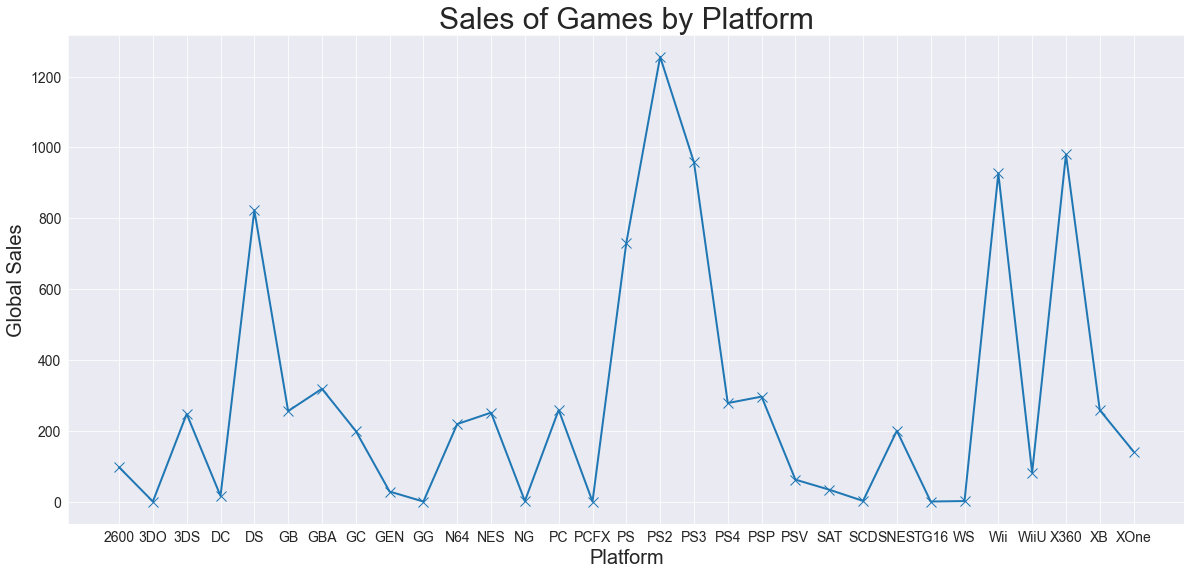

In [37]:
plt.plot(platform_df.Platform, platform_df.Global_Sales, marker="x", ms=10, lw=2)

plt.xlabel("Platform",fontsize=20)
plt.ylabel("Global Sales",fontsize=20)
plt.title("Sales of Games by Platform",fontsize=30);

PS2 is by far the most successful platform out of the bunch. In fact Sony's PlayStation 2 is the best selling console of all time with over 155 million units sold worldwide. I had one myself. The games were relatively cheap and were of high quality.

### **Comparing NA sales, EU sales and JP sales of the top 5 most selling games**

In [8]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Luckily our dataset is already sorted in descending order of global sales so all we have to do is to pick the first 5 records from the dataframe using the `head()` method. 

In [9]:
top_df=video_games_df.head(5)

In [10]:
top_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


- In order to plot multiple lines on the same graph, we will invoke the `plt.plot` function multiple times.
- Each of the line is given a different colour and a marker so as to avoid any confusion.
- We are also using the `plt.legend` function to add a legend to the graph.

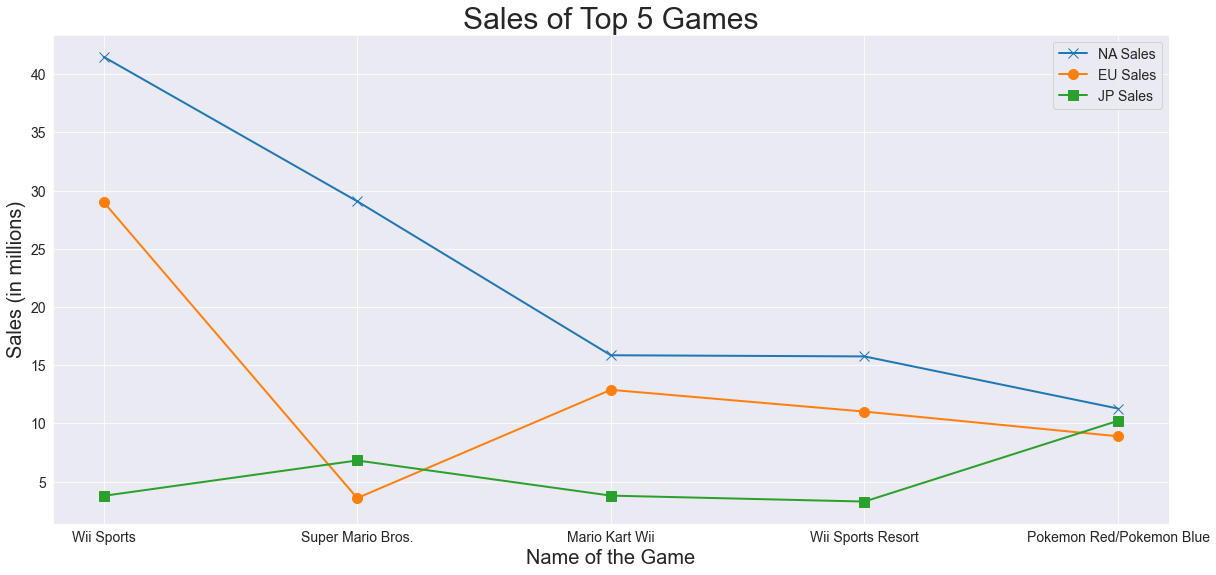

In [33]:
plt.plot(top_df.Name, top_df.NA_Sales, marker="x", lw=2, ms=10)

plt.plot(top_df.Name, top_df.EU_Sales, marker="o", lw=2, ms=10 )

plt.plot(top_df.Name, top_df.JP_Sales, marker="s", lw=2, ms=10 )

plt.legend(["NA Sales", "EU Sales", "JP Sales"])


plt.xlabel("Name of the Game", fontsize=20)
plt.ylabel("Sales (in millions)", fontsize=20)
plt.title("Sales of Top 5 Games", fontsize=30);

Clearly the North-American region offers publishers with the most profitable market when compared to the European and Japanese regions. However, it is unfair that the dataset does not contain data related to the Asian region because it is a huge market for games as well. 

### **Creating a Scatterplot for a random set of games from the dataframe**

In order to radomly select n rows from the dataframe,  we will use the `sample()` method.

In [28]:
random_df = video_games_df.sample(1000)

In [29]:
random_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2880,2882,Scooby-Doo 2: Monsters Unleashed,GBA,2004.0,Action,THQ,0.51,0.19,0.00,0.01,0.71
6332,6334,Medarot 3: Kabuto / Kuwagata Version,GB,2000.0,Role-Playing,Imagineer,0.00,0.00,0.27,0.00,0.27
14249,14252,The Binding of Isaac,PC,2012.0,Action,Unknown,0.00,0.03,0.00,0.00,0.03
12708,12710,G1 Jockey 2,PS2,2000.0,Sports,Tecmo Koei,0.00,0.00,0.06,0.00,0.06
14180,14182,Women's Volleyball Championship,PS2,2007.0,Sports,Spike,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...
8400,8402,Jikkyou Powerful Pro Baseball 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.00,0.00,0.17,0.00,0.17
3554,3556,LEGO Rock Band,X360,2009.0,Misc,Warner Bros. Interactive Entertainment,0.40,0.12,0.00,0.05,0.57
6928,6930,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.09,0.10,0.00,0.05,0.24
15720,15723,Arslan: The Warriors of Legend,XOne,2016.0,Action,Tecmo Koei,0.01,0.00,0.00,0.00,0.02


Each time we execute the above command, we will get 1000 random rows.

<br/> 

- In a scatterplot, the values of two variables are plotted as points on a 2-D grid.  
- Dots are coloured using the `hue` argument. 
- The points are made larger using the `s` argument.

D:\Anaconda_Navigator\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


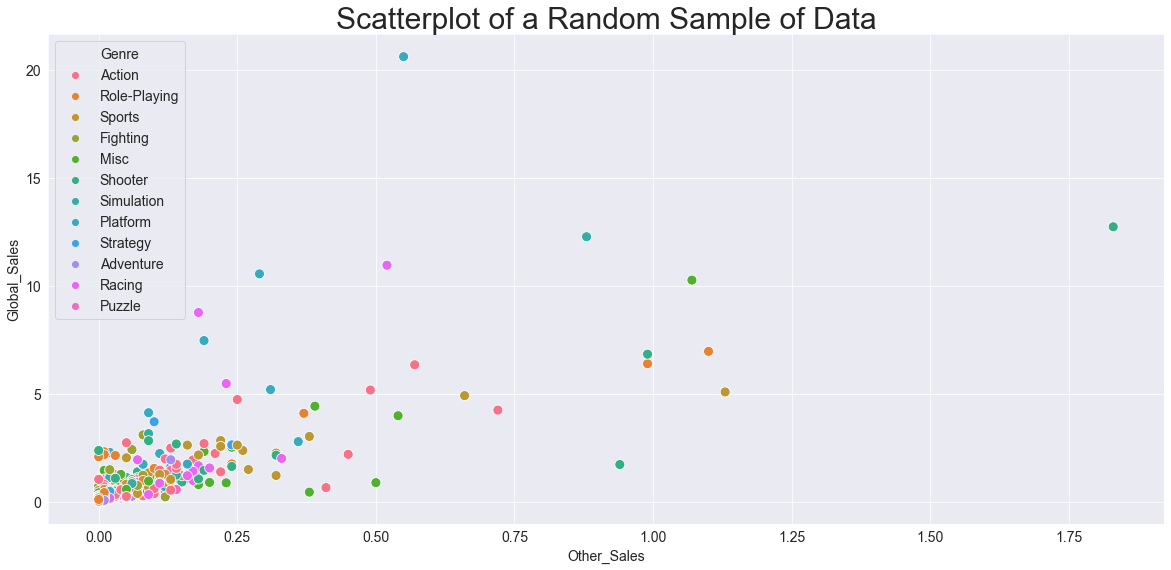

In [32]:
plt.title("Scatterplot of a Random Sample of Data", fontsize=30)

sns.scatterplot(random_df.Other_Sales,
                random_df.Global_Sales,
                hue= random_df.Genre,
                s=100);

Let us save and upload our work to Jovian before continuing

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "singularity-101/video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'

## Asking and Answering Questions

Now in this section I will be asking some relevant questions about my dataset and I will be answering them using the knowledge I have gained in this course.

In [41]:
video_games_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Q1: What are the different Genres of games in the Dataframe?

Each column in a dataframe is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

The `unique` method in pandas is used to to get unique values from a series object. Uniques are returned in order of appearance.

In [43]:
video_games_df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

#### Q2: What are the different platforms on which games are released?

In [44]:
video_games_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Q3: List of publishers who released games

In [45]:
video_games_df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


#### Q4: Top 10 games most popular in Japan?

To view the first or last few rows of data, we use the `.head` and `.tail` method 

We chained the `sort_values` method with the `.head` method to get the top 10 games which were most popular in Japan.

In [49]:
video_games_df.sort_values("JP_Sales",ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


As you can see, the most popular games in Japan were either published by Nintendo or Capcom which makes sense because both of these companies are based in Japan and that's why they have a strong foothold in this regions.

#### Q5: On which platform most amount of games were released ?

Here, we are using the `count()` method to aggreagate the data.

In [78]:
video_games_df.groupby("Platform")["Platform"].count().sort_values(ascending=False)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

The most amount of games were released for the Nintendo DS platform followed by Sony's PlayStation 2 and PlayStation 3.

#### Q6: Which genre of games is most popular among customers?

In [20]:
video_games_df.groupby("Genre")[["Global_Sales"]].sum().sort_values("Global_Sales",ascending=False)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


We can infer that the "Action" game genre is the most popular among customers and will net the companies most profit.

#### Q7: Which region is the most profitable for companies?

The `mean()` method returns the mean of the values for the requested axis 

In [62]:
video_games_df.NA_Sales.mean()

0.26466742981084057

In [63]:
video_games_df.EU_Sales.mean()

0.1466520062658483

In [64]:
video_games_df.JP_Sales.mean()

0.07778166044101108

It is clear that games are most popular in the North-American region follwed by the European Region and then Japan.

So most video game companies try to make games that cater to the American audience because it is the biggest market.

Let us save and upload our work to Jovian before continuing.

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "singularity-101/video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'

## Inferences and Conclusion


Here is the list of conclusions I have drawn from studying the above data:-
* Gaming is most popular in the North-American region.
* The "Action" genre of games are the most popular among customers.
* Nintendo and Capcom have a strong presence in Japan.
* The average sales of games in the North-American region is far higher than the Japanese or European region.
* Sony's PlayStation 2 is the most successful console ever made.


In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "singularity-101/video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'

## References and Future Work


This was a very fun project. However, the dataset can be improved in a variety of ways:-
- Adding sales for the Asian Region because it is a huge market as well.
- Including next-gen platforms like XBOX series X and PlayStation 5.
- Refreshing the dataset with more recent statistics.

<br/>

Resources:-
- https://www.geeksforgeeks.org/
- https://stackoverflow.com/
- https://www.python.org/
- https://realpython.com/


In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "singularity-101/video-game-sales" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/singularity-101/video-game-sales


'https://jovian.ml/singularity-101/video-game-sales'